
# 🧪 Autonomous Activity: Dimensionality Reduction on Embryo Development Timelapse

## Group 5: Jhon Villacís, Jorge Pico

In this hands-on activity, you will apply a variety of dimensionality reduction techniques to analyze real microscopy data. The dataset contains time-lapse images of normal and mutant embryos. Each image stack has approximately 450 frames.

---

**🎯 Objectives:**
- Explore, visualize, and preprocess multi-frame `.tif` images.
- Test and compare different data normalization strategies (e.g., [0,1] scaling vs StandardScaler).
- Use PCA, SVD, t-SNE, UMAP, and Autoencoders to extract and visualize developmental trajectories.
- Identify biological differences in developmental dynamics between embryo types.
- Reflect on the advantages, limitations, and behaviors of each technique.

📁 **Dataset:** [Google Drive Link](https://drive.google.com/drive/folders/1_qxqm-v5yCrme3pAW2rjyOOXIeQDuV54?usp=drive_link)


In [ ]:
# Mount Drive/Data
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/ML/week2

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ML/week2


In [ ]:
import tifffile as tiff
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.datasets import load_digits


## 1. Load and Explore the Dataset

Each `.tif` file contains ~450 grayscale frames. Your first task is to:
- Load the 3 `.tif` files using `tifffile.imread`.
- Normalize each image stack using two strategies:
  - [0, 1] Min-Max normalization
  - Standardization using `StandardScaler`
- Plot a few representative frames across time for each embryo.


In [ ]:
# Load the 3 .tif files using tifffile.imread.

Mutatnt1 = tiff.imread("Mutatnt1.tif")
Mutatnt2 = tiff.imread("Mutatnt2.tif")
Control  = tiff.imread("Control.tif")

# print(Mutatnt1.shape)
# print(Mutatnt2.shape)
# print(Control.shape)
# print(Mutatnt1.dtype)

In [ ]:
# Normalization

# [0, 1] Min-Max normalization
Mutatnt1_minmax = (Mutatnt1 - Mutatnt1.min()) / (Mutatnt1.max() - Mutatnt1.min())
Mutatnt2_minmax = (Mutatnt2 - Mutatnt2.min()) / (Mutatnt2.max() - Mutatnt2.min())
Control_minmax = (Control - Control.min()) / (Control.max() - Control.min())

# Standardization using StandardScaler
scaler = StandardScaler()
Mutatnt1_stand = scaler.fit_transform(Mutatnt1.reshape(Mutatnt1.shape[0], -1)).reshape(Mutatnt1.shape)
Mutatnt2_stand = scaler.fit_transform(Mutatnt2.reshape(Mutatnt2.shape[0], -1)).reshape(Mutatnt2.shape)
Control_stand = scaler.fit_transform(Control.reshape(Control.shape[0], -1)).reshape(Control.shape)

# print(np.min(Mutatnt1),np.max(Mutatnt1))
# print(np.min(Mutatnt1_minmax),np.max(Mutatnt1_minmax))
# print(np.min(Mutatnt1_stand),np.max(Mutatnt1_stand))

In [ ]:
def plot_frames(stack, title, indices=[0, 150, 300, 449]):
    plt.figure(figsize=(12,3))
    for i, idx in enumerate(indices):
        plt.subplot(1, len(indices), i+1)
        # We use cmap gray to standarize the colors
        plt.imshow(stack[idx], cmap="gray")
        plt.title(f"{title}\nFrame {idx}")
        plt.axis('off')
    plt.show()

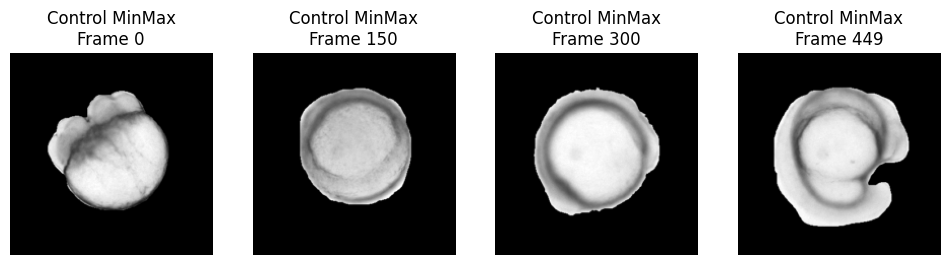

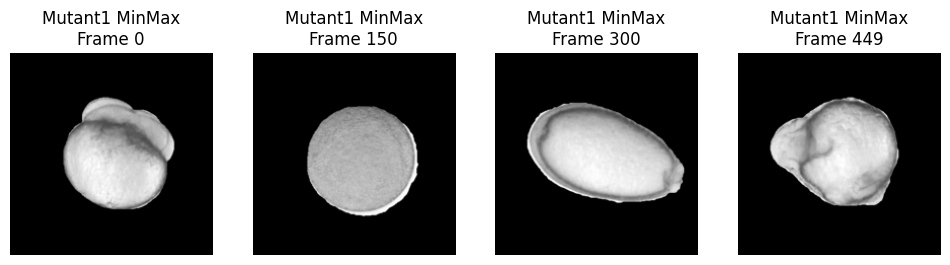

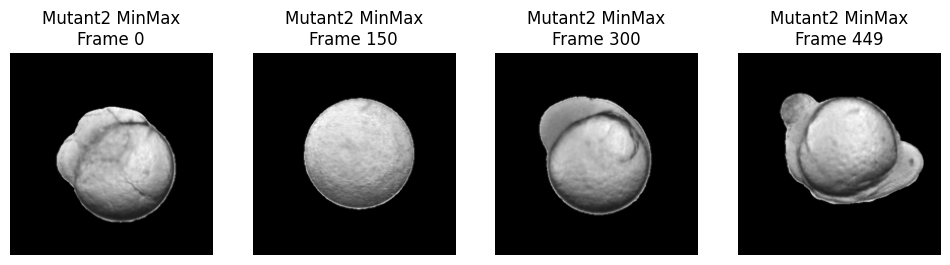

In [ ]:
plot_frames(Control_minmax, "Control MinMax")
plot_frames(Mutatnt1_minmax, "Mutant1 MinMax")
plot_frames(Mutatnt2_minmax, "Mutant2 MinMax")

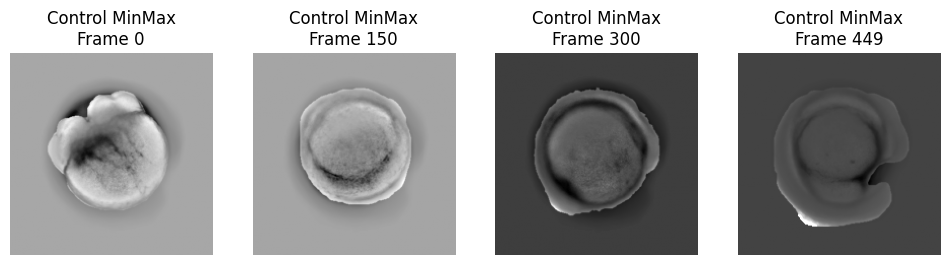

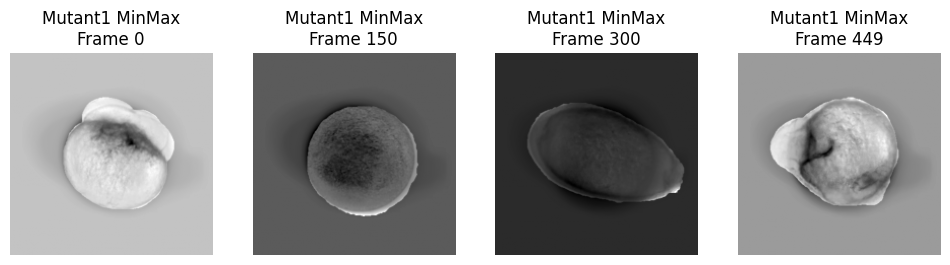

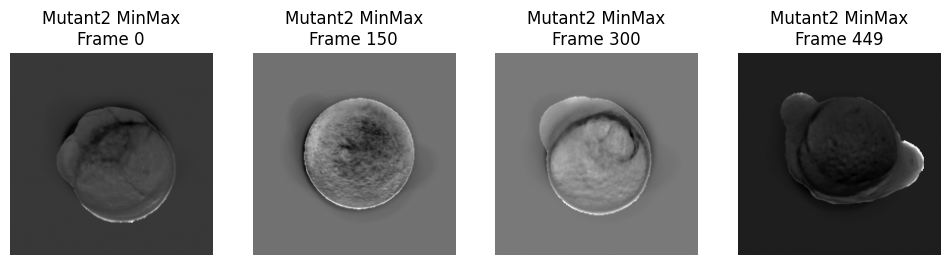

In [ ]:
plot_frames(Control_stand, "Control MinMax")
plot_frames(Mutatnt1_stand, "Mutant1 MinMax")
plot_frames(Mutatnt2_stand, "Mutant2 MinMax")


## 2. Preprocess the Data

Flatten each frame and construct a matrix `X` with shape `(n_frames, n_pixels)` for each normalization method. Then create a label vector:

- `label = 0` → control embryo
- `label = 1` → mutant 1
- `label = 2` → mutant 2

This step will prepare the input data for dimensionality reduction.


In [ ]:
Mutatnt1_minmax = Mutatnt1_minmax.reshape(Mutatnt1_minmax.shape[0], -1)
Mutatnt2_minmax = Mutatnt2_minmax.reshape(Mutatnt2_minmax.shape[0], -1)
Control_minmax = Control_minmax.reshape(Control_minmax.shape[0], -1)

Mutatnt1_stand= Mutatnt1_stand.reshape(Mutatnt1_stand.shape[0], -1)
Mutatnt2_stand = Mutatnt2_stand.reshape(Mutatnt2_stand.shape[0], -1)
Control_stand = Control_stand.reshape(Control_stand.shape[0], -1)


X_minmax = np.vstack([Control_minmax, Mutatnt1_minmax, Mutatnt2_minmax])
X_standard = np.vstack([Control_stand, Mutatnt1_stand, Mutatnt2_stand])
labels = np.array([[0]*450 + [1]*450 + [2]*450]).flatten()

print(X_minmax.shape)
print(X_standard.shape)
print(labels.shape)

(1350, 40000)
(1350, 40000)
(1350,)



> 🧪 **Experiment**: Try running all dimensionality reduction methods with both versions of the input (`X_minmax` and `X_standard`) and compare how they affect embeddings and separability.



## 3. PCA (Principal Component Analysis)

Apply PCA on both normalized datasets:
- Visualize the 2D PCA embedding colored by embryo type.
- Compare the separation between classes for `X_minmax` and `X_standard`.
- Plot the **explained variance ratio** and **cumulative variance** for each.

> 🧠 Tip: Use `PCA(n_components=2)` for plotting and `PCA(n_components=50)` to analyze cumulative variance.


In [ ]:
# 2D PCA
pca = PCA(n_components=2)

pca_minmax = pca.fit_transform(X_minmax)
pca_standard = pca.fit_transform(X_standard)

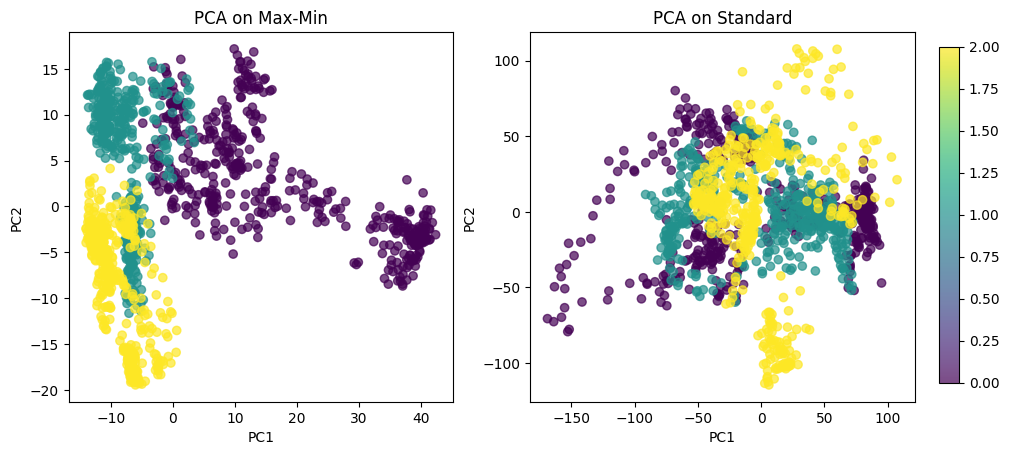

In [ ]:
# Plot 2D PCA
fig, axs = plt.subplot_mosaic('AB', figsize=1*plt.figaspect(1/2.5))
scatter = axs['A'].scatter(pca_minmax[:, 0], pca_minmax[:, 1], c=labels, alpha=0.7)
axs['A'].set_title("PCA on Max-Min")
axs['B'].scatter(pca_standard[:, 0], pca_standard[:, 1], c=labels, alpha=0.7)
axs['B'].set_title("PCA on Standard")


fig.subplots_adjust(right=0.83)
cbar_ax = fig.add_axes([0.85, 0.15, 0.017, 0.7])
fig.colorbar(scatter, cax=cbar_ax)
for n, (no, ax) in enumerate(axs.items()):
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")

plt.show()
plt.close()

In [ ]:
# Explained variance ratio minmax
pca1 = PCA(n_components=50)
pca_minmax = pca1.fit_transform(X_minmax)
explained_var_minmax = pca1.explained_variance_ratio_
cumulative_var_minmax = np.cumsum(explained_var_minmax)

# Explained variance ratio standard
pca2 = PCA(n_components=50)
pca_standard = pca2.fit_transform(X_standard)
explained_var_standard = pca2.explained_variance_ratio_
cumulative_var_standard = np.cumsum(explained_var_standard)

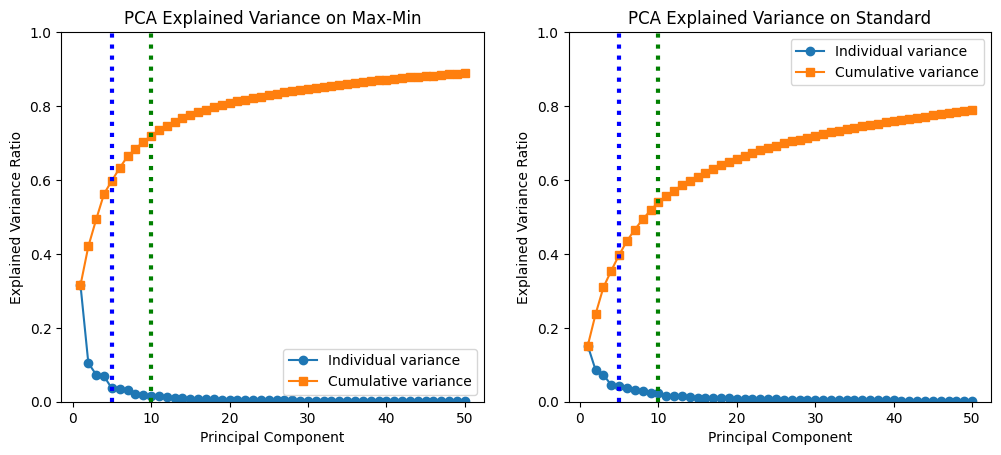

In [ ]:
# Plot PCA Explained Variance
fig, axs = plt.subplot_mosaic('AB', figsize=1*plt.figaspect(1/2.5))

axs['A'].set_title("PCA Explained Variance on Max-Min")
axs['A'].plot(np.arange(1, len(explained_var_minmax)+1), explained_var_minmax, marker='o', label="Individual variance")
axs['A'].plot(np.arange(1, len(cumulative_var_minmax)+1), cumulative_var_minmax, marker='s', label="Cumulative variance")

axs['B'].set_title("PCA Explained Variance on Standard")
axs['B'].plot(np.arange(1, len(explained_var_standard)+1), explained_var_standard, marker='o', label="Individual variance")
axs['B'].plot(np.arange(1, len(cumulative_var_standard)+1), cumulative_var_standard, marker='s', label="Cumulative variance")

for n, (no, ax) in enumerate(axs.items()):
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Explained Variance Ratio")
    ax.axvline(x=10, color='green', linestyle=':', linewidth=3)
    ax.axvline(x=5, color='blue', linestyle=':', linewidth=3)
    ax.set_ylim((0,1))
    ax.legend()

plt.show()
plt.close()


## 4. SVD (Singular Value Decomposition)

Apply SVD to both datasets and analyze:
- The decay of singular values on a log scale.
- The cumulative energy of singular values.
- Compare how quickly each normalization captures energy.

> 🔍 Insight: SVD reveals the inherent structure of your dataset. A sharper drop often suggests stronger linear compressibility.


In [ ]:
# SVD decomposition
U_m, S_m, Vt_m = np.linalg.svd(X_minmax, full_matrices=False)
U_s, S_s, Vt_s = np.linalg.svd(X_standard, full_matrices=False)

In [ ]:
# Energy = squared singular values
energy_m = np.cumsum(S_m**2)
energy_s = np.cumsum(S_s**2)

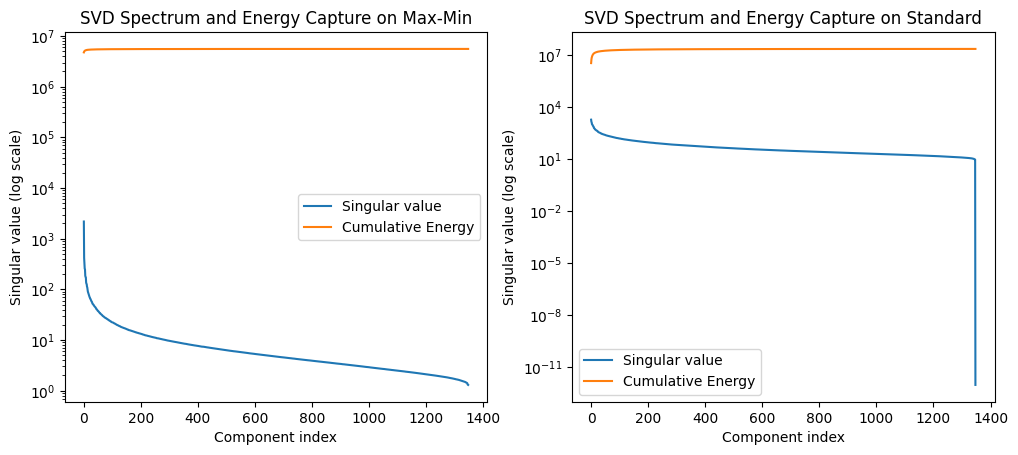

In [ ]:
# Plot PCA Explained Variance
fig, axs = plt.subplot_mosaic('AB', figsize=1*plt.figaspect(1/2.5))

axs['A'].set_title("SVD Spectrum and Energy Capture on Max-Min")
axs['A'].semilogy(S_m, label="Singular value")
axs['A'].semilogy(energy_m, label="Cumulative Energy")

axs['B'].set_title("SVD Spectrum and Energy Capture on Standard")
axs['B'].semilogy(S_s[:-2], label="Singular value")
axs['B'].semilogy(energy_s[:-2], label="Cumulative Energy")

for n, (no, ax) in enumerate(axs.items()):
    ax.set_xlabel("Component index")
    ax.set_ylabel("Singular value (log scale)")
    ax.legend()

plt.show()
plt.close()


## 5. t-SNE

Use t-SNE to capture local structure and dynamics:
- Run t-SNE with different perplexities `[5, 30, 100]`.
- Plot the 2D embeddings and analyze how clusters behave.
- Compare results between both normalized inputs.

> ⏳ Note: t-SNE is computationally intensive and sensitive to hyperparameters.


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def run_tsne(X, perplexity=30, random_state=42):
    """
    Run t-SNE directly on the dataset X.
    - Reduces X to 2D using t-SNE with the given perplexity.
    Returns: Y_tsne (N, 2)
    """
    tsne = TSNE(
        n_components=2,
        init="pca",            # initialization (doesn't actually run PCA)
        learning_rate="auto",
        perplexity=perplexity,
        random_state=random_state,
        n_iter=1000
    )
    Y = tsne.fit_transform(X)
    return Y

def plot_tsne(Y, y, title="t-SNE 2D"):
    """
    Scatter plot of t-SNE embeddings.
    - Y: t-SNE coordinates (N,2)
    - y: labels (0=Control, 1=Mutant1, 2=Mutant2)
    """
    plt.figure(figsize=(5,4), dpi=120)
    for label, name in {0:"Control", 1:"Mutant1", 2:"Mutant2"}.items():
        m = (y == label)
        plt.scatter(Y[m,0], Y[m,1], s=6, label=name)
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.title(title)
    plt.legend()
    plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarnin

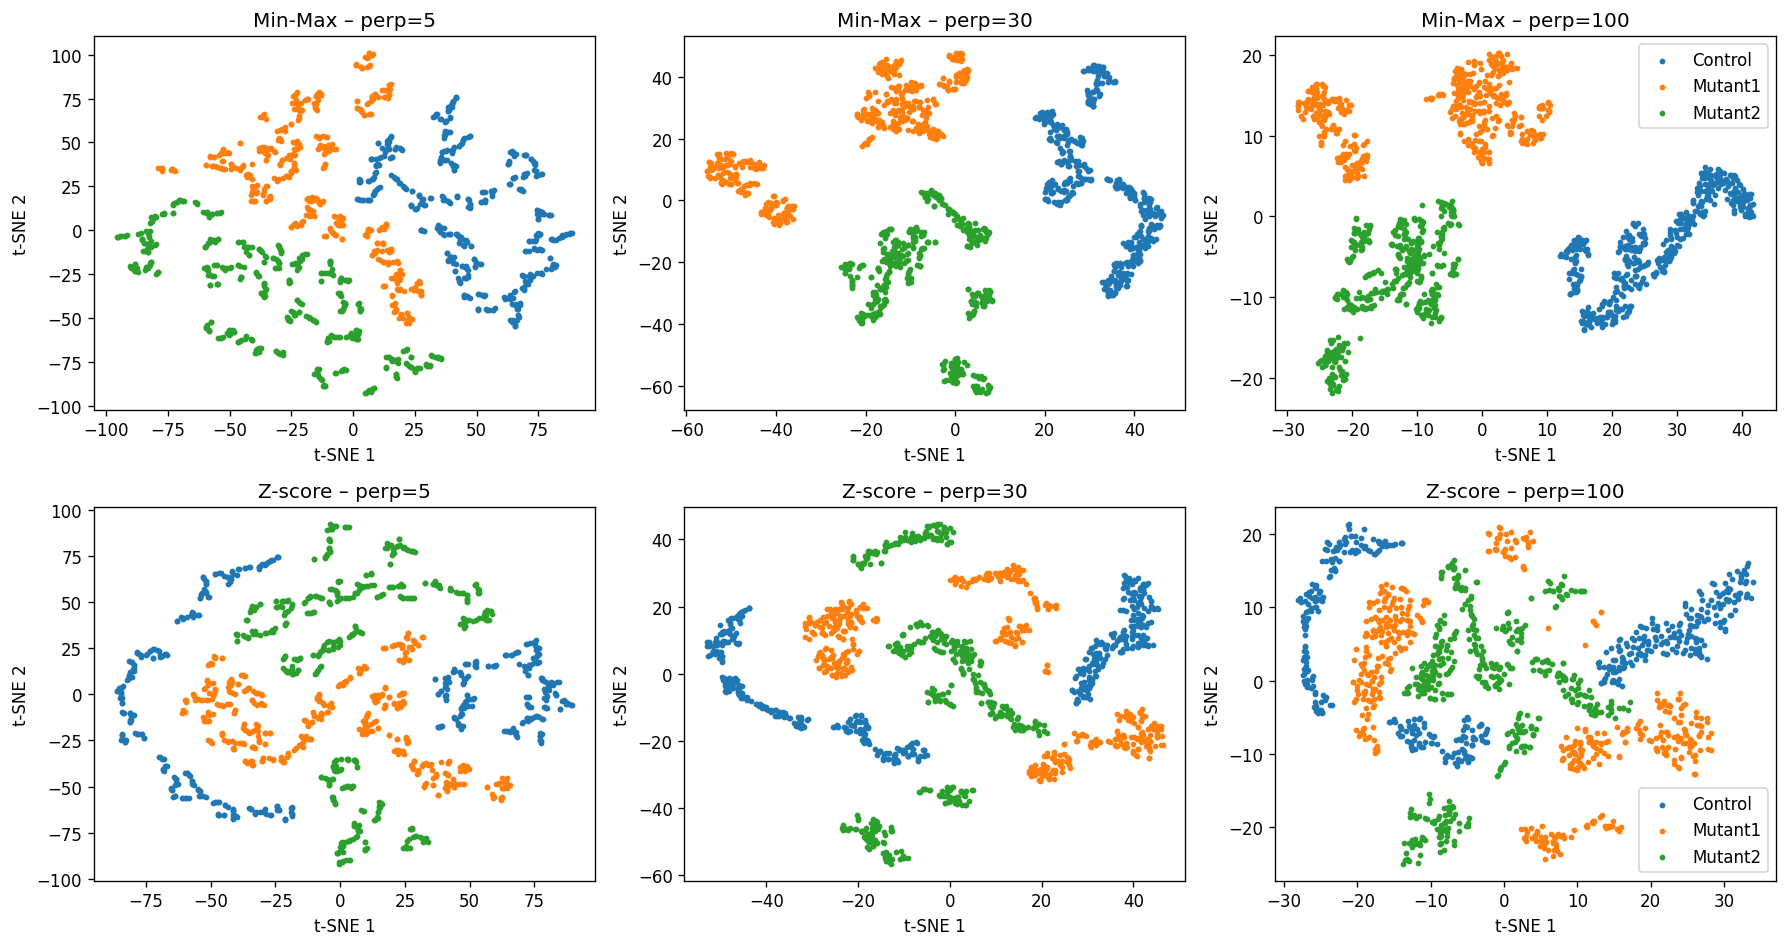

In [ ]:
import matplotlib.pyplot as plt

def tsne_grid(X_min, y_min, X_std, y_std, perps=[5, 30, 100], random_state=42):
    fig, axes = plt.subplots(2, len(perps), figsize=(5*len(perps), 8), dpi=120)

    for j, p in enumerate(perps):
        # --- Min-Max (row 0)
        Y_min = run_tsne(X_min, perplexity=p, random_state=random_state)
        ax = axes[0, j]
        for lab, name in {0:"Control",1:"Mutant1",2:"Mutant2"}.items():
            m = (y_min == lab)
            ax.scatter(Y_min[m,0], Y_min[m,1], s=6, label=name)
        ax.set_title(f"Min-Max – perp={p}")
        ax.set_xlabel("t-SNE 1"); ax.set_ylabel("t-SNE 2")
        if j == len(perps)-1:  # add legend only once
            ax.legend()

        # --- Z-score (row 1)
        Y_std = run_tsne(X_std, perplexity=p, random_state=random_state)
        ax = axes[1, j]
        for lab, name in {0:"Control",1:"Mutant1",2:"Mutant2"}.items():
            m = (y_std == lab)
            ax.scatter(Y_std[m,0], Y_std[m,1], s=6, label=name)
        ax.set_title(f"Z-score – perp={p}")
        ax.set_xlabel("t-SNE 1"); ax.set_ylabel("t-SNE 2")
        if j == len(perps)-1:
            ax.legend()

    plt.tight_layout()
    plt.show()

# Run the grid
tsne_grid(X_minmax, labels, X_standard, labels, perps=[5, 30, 100])


## 6. UMAP

Use UMAP for global structure visualization:
- Try combinations of `n_neighbors` and `min_dist`.
- Compare embeddings across normalization methods.
- Observe both local clustering and trajectory smoothness.

> 📌 UMAP is faster and often preserves better continuity in developmental trajectories.


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr

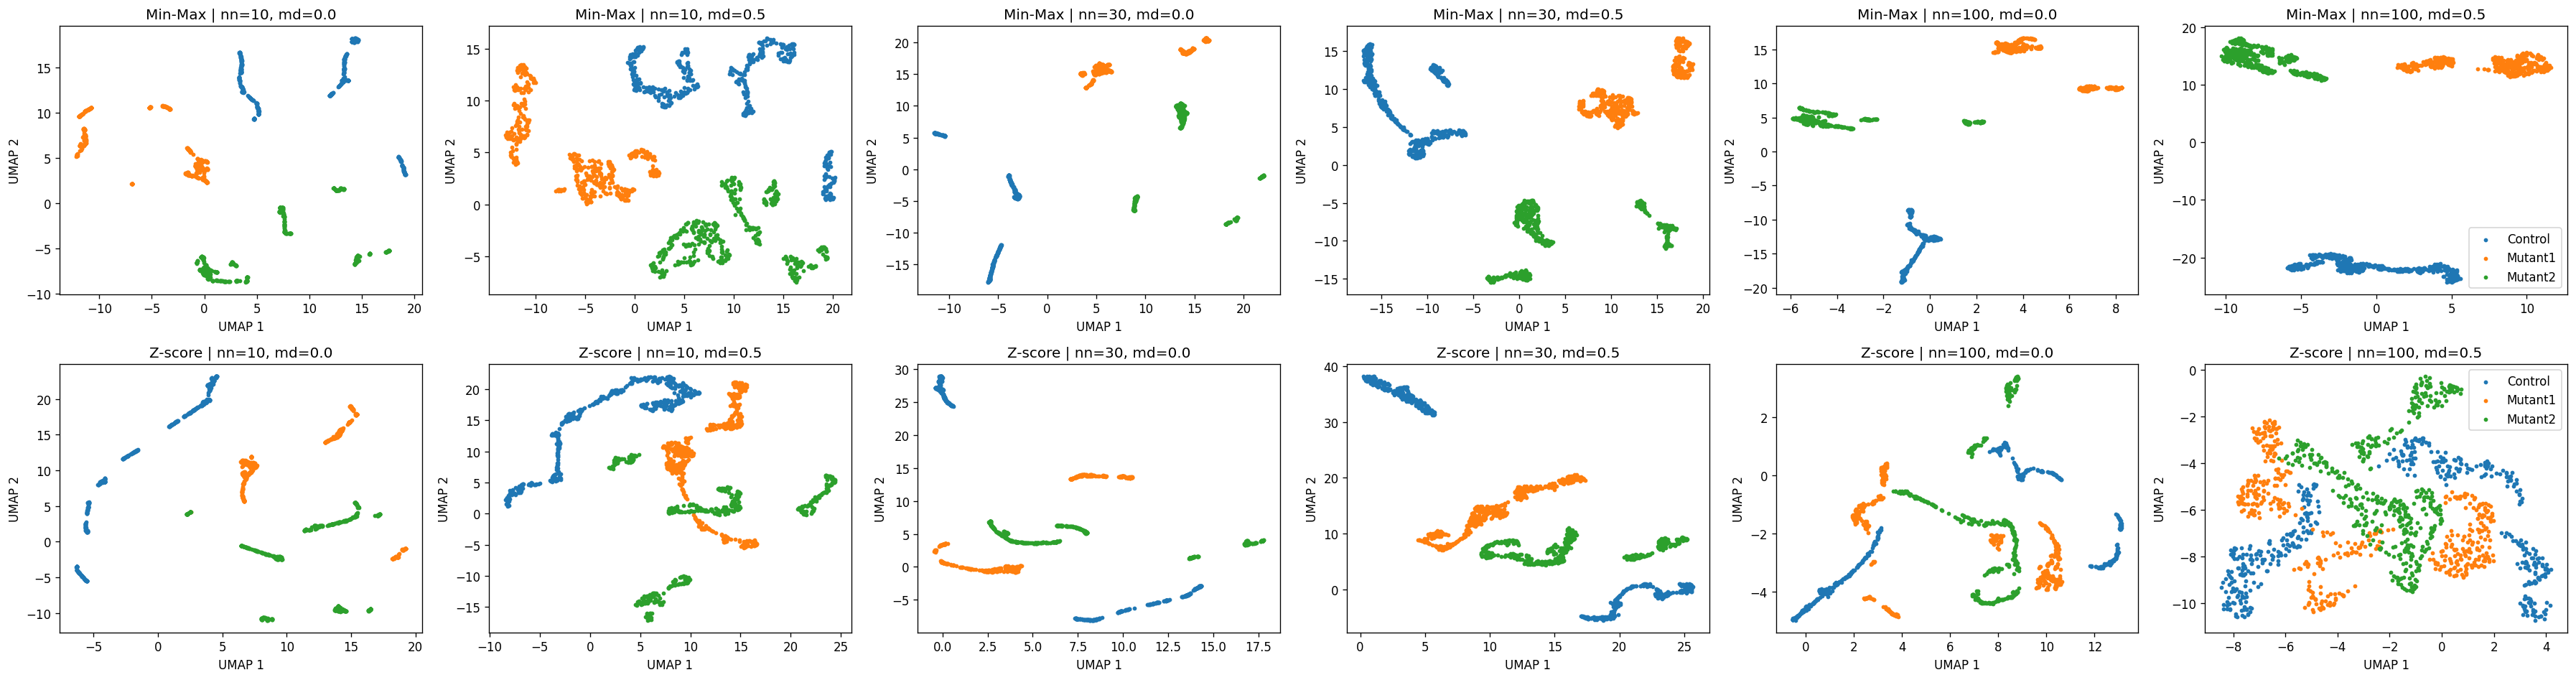

In [ ]:
import umap

def run_umap(X, n_neighbors=15, min_dist=0.1, random_state=42):
  reducer = umap.UMAP(
      n_components=2,
      n_neighbors=n_neighbors,
      min_dist=min_dist,
      random_state=random_state

  )
  X_umap = reducer.fit_transform(X)
  return X_umap

def plot_embedding_on_ax(ax, Y, y, title):
    for lab, name in {0: "Control", 1: "Mutant1", 2: "Mutant2"}.items():
        m = (y == lab)
        ax.scatter(Y[m, 0], Y[m, 1], s=6, label=name)
    ax.set_xlabel("UMAP 1")
    ax.set_ylabel("UMAP 2")
    ax.set_title(title)
def umap_grid(X_min, y_min, X_std, y_std,
              neighbors_list=(10, 30, 100), min_dist_list=(0.0, 0.5),
              random_state=42):
    combos = [(nn, md) for nn in neighbors_list for md in min_dist_list]
    ncols = len(combos)
    fig, axes = plt.subplots(2, ncols, figsize=(5*ncols, 8), dpi=120)

    for j, (nn, md) in enumerate(combos):
        # Min-Max
        Y_min = run_umap(X_min, n_neighbors=nn, min_dist=md, random_state=random_state)
        ax = axes[0, j] if ncols > 1 else axes[0]
        plot_embedding_on_ax(ax, Y_min, y_min, title=f"Min-Max | nn={nn}, md={md}")
        if j == ncols - 1:
            ax.legend()

        # Z-score
        Y_std = run_umap(X_std, n_neighbors=nn, min_dist=md, random_state=random_state)
        ax = axes[1, j] if ncols > 1 else axes[1]
        plot_embedding_on_ax(ax, Y_std, y_std, title=f"Z-score | nn={nn}, md={md}")
        if j == ncols - 1:
            ax.legend()

    plt.tight_layout()
    plt.show()

# UMAP
umap_grid(
    X_minmax, labels,
    X_standard, labels,
    neighbors_list=[10, 30, 100],
    min_dist_list=[0.0, 0.5],
    random_state=42
)


## 7. Autoencoder

Train a neural autoencoder to learn a 2D latent space:
- Architecture: `input → 128 → 32 → 2 → 32 → 128 → output`
- Use ReLU activations and MSE loss.
- Plot the latent 2D representations colored by embryo.

> 💡 Autoencoders are flexible nonlinear methods that may capture dynamics not seen by linear projections.


In [ ]:
# Autoencoder Latent Space Min-Max
from tensorflow.keras import layers, models

input_dim = X_minmax.shape[1]

encoder = models.Sequential([
 layers.Input(shape=(input_dim,)),
 layers.Dense(128, activation="relu"),
 layers.Dense(32, activation="relu"),
 layers.Dense(2) # latent space
])

decoder = models.Sequential([
 layers.Input(shape=(2,)),
 layers.Dense(32, activation="relu"),
 layers.Dense(128, activation="relu"),
 layers.Dense(input_dim, activation="sigmoid")
])

autoencoder = models.Sequential([encoder, decoder])
autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.fit(X_minmax , X_minmax , epochs=20, batch_size=256, verbose=0)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


/tmp/ipython-input-112054627.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_latent[600, 0], X_latent[600, 1], c='tab:brown', cmap="tab10", label='Mutant 1')
/tmp/ipython-input-112054627.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_latent[1300, 0], X_latent[1300, 1], c='cyan', cmap="tab10", label='Mutant 2')


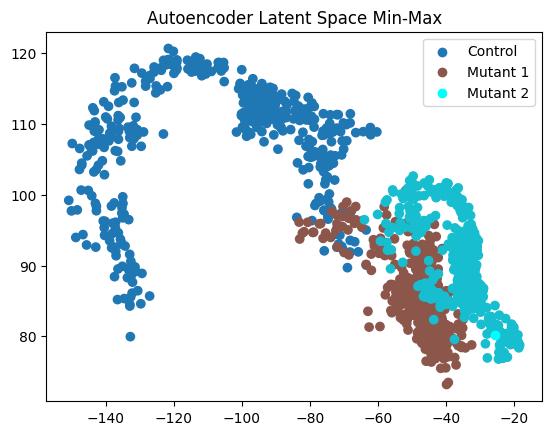

In [ ]:
X_latent = encoder.predict(X_minmax)

plt.figure()
plt.scatter(X_latent[:, 0], X_latent[:, 1], c=labels, cmap="tab10")
plt.scatter(X_latent[0, 0], X_latent[0, 1], c=labels[0], cmap="tab10", label='Control')
plt.scatter(X_latent[600, 0], X_latent[600, 1], c='tab:brown', cmap="tab10", label='Mutant 1')
plt.scatter(X_latent[1300, 0], X_latent[1300, 1], c='cyan', cmap="tab10", label='Mutant 2')
plt.title("Autoencoder Latent Space Min-Max")
plt.legend()
plt.show()
plt.close()

In [ ]:
# Autoencoder Latent Space Min-Max Standarized

autoencoder2 = models.Sequential([encoder, decoder])
autoencoder2.compile(optimizer="adam", loss="mse")
autoencoder2.fit(X_standard , X_standard , epochs=20, batch_size=256, verbose=0)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/tmp/ipython-input-1628739495.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_latent2[600, 0], X_latent2[600, 1], c='tab:brown', cmap="tab10", label='Mutant 1')
/tmp/ipython-input-1628739495.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_latent2[1300, 0], X_latent2[1300, 1], c='cyan', cmap="tab10", label='Mutant 2')


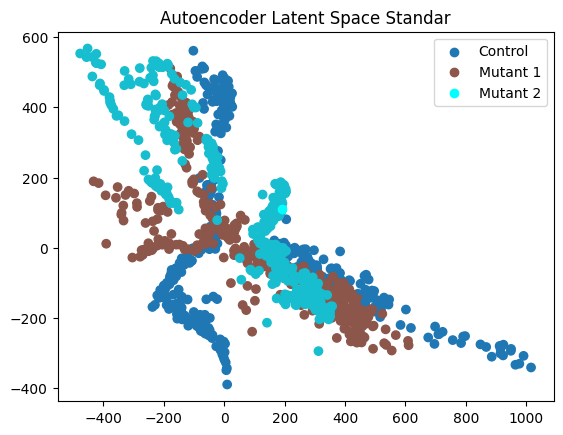

In [ ]:
X_latent2 = encoder.predict(X_standard)
plt.scatter(X_latent2[:, 0], X_latent2[:, 1], c=labels, cmap="tab10")
plt.scatter(X_latent2[0, 0], X_latent2[0, 1], c=labels[0], cmap="tab10", label='Control')
plt.scatter(X_latent2[600, 0], X_latent2[600, 1], c='tab:brown', cmap="tab10", label='Mutant 1')
plt.scatter(X_latent2[1300, 0], X_latent2[1300, 1], c='cyan', cmap="tab10", label='Mutant 2')
plt.title("Autoencoder Latent Space Standar")
plt.legend()
plt.show()
plt.close()


## 8. Final Reflection

Write a short report answering the following:

1. What differences in developmental dynamics did you observe?
2. Which method best captured biologically relevant features?
3. Which normalization (Min-Max or StandardScaler) led to better embeddings?
4. At which point do mutant trajectories diverge from normal?
5. How consistent were the results across methods (PCA, t-SNE, UMAP, Autoencoders)?

> 📝 Submit this as a 1-page summary or short presentation.


### 1. 
From the representative frames plotted of each embryo, despite rotations, we visually identified that in the control embryo its whole structure develops correctly we can intuit its head, spine and tail as marked protuberances on the more regular and spherical surface of the embryo.

### 2. 
We obtain the best results with t-SNE and autoencoders. With these methods pretty decent clusters were formed in the 2D representation of the data allowing clear distinction between the embryo types. But in terms of interpretability we couldn't asociate any biological features.

### 3.
Min-Max normalization produced better results in all dimensionality reduction methods.

### 4. 
Mutant trajectories tend to deviate after the initial development stages. This suggest that early processes look pretty similar even for the dimensionality reduction models.

### 5. 
PCA and SVD were pretty consistent since they are deterministic methods.
Along with the stochastic non-linear methods we found UMAP highly inconsistent so we do not consider a suitable method for this type of data. While t-SNE shows a performance we can mark as consistent since it produced representations that shared overall shapes. Finally, the autoencoder was the most consistent method with which we obtained very similar representations each time we trained it. 